In [1]:
#file to import results, process them, and get some outputs from which I can analyse.

#hodge podge of imports, defo wont need them all but will need some
import os
import xlrd
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator

In [11]:
df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\4th year\\4yp\\Results\\stopstart1822.csv",)
df.drop(df.index[0:58],inplace=True) #should be same for every dataset I save 
df.drop("run",axis=1,inplace=True)
df.drop("type",axis=1,inplace=True)
df.drop("attrname",axis=1,inplace=True)
df.drop("attrvalue",axis=1,inplace=True)
df.drop("value",axis=1,inplace=True)
df = df.assign(module = lambda x: x['module'].str.extract('(\d+)')) #extracts number from string
df["classification"] = ""
df["module"] = df['module'].astype(str).astype(int)
df = df.rename(columns={'vectime': 'time', 'vecvalue': 'value'})
#df.to_csv('stopstart1822e.csv', index=False)



In [32]:
df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\4th year\\4yp\\Results\\auto100.csv",)
df.drop(df.index[0:58],inplace=True) #should be same for every dataset I save 
df.drop("run",axis=1,inplace=True)
df.drop("type",axis=1,inplace=True)
df.drop("attrname",axis=1,inplace=True)
df.drop("attrvalue",axis=1,inplace=True)
df.drop("value",axis=1,inplace=True)
df = df.assign(module = lambda x: x['module'].str.extract('(\d+)')) #extracts number from string
df["classification"] = ""
df["module"] = df['module'].astype(str).astype(int)
df = df.rename(columns={'vectime': 'time', 'vecvalue': 'value'})
#df.to_csv('stopstart1822e.csv', index=False)


#df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\4th year\\4yp\\Results\\slowdown10_edited.csv",)
#df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\4th year\\4yp\\Results\\stopstart2218e.csv",)
df = df.rename(columns={'module': 'car','name':'param'})
df = df.replace(' ',',', regex=True)
df["class"] = ""

for i in range(len(df)):
    a = eval(df.iloc[i]['value'])
    b = df.iloc[i]['car']
    if df.iloc[i]['param'] == "posx" and a[0] < 100:
        df.at[df["car"] == b,'class'] = "left"

    if df.iloc[i]['param'] == "posy" and a[0] > 400:
        df.at[df["car"] == b,'class'] = "bottom"
df.drop(df.index[df["param"] != "speed"],inplace=True) #should be same for every dataset I save 


df_left = df[df["class"] == "left"]
df_bottom = df[df["class"] == "bottom"]

Overall simulation statistics
 simulation time is 145 
 Mean time is 42.30 
 Median time is 41.0 
 Max time is 59 
 Mean stop time is 9.975 
 Max stop time is 27 
 Mean speed is 9.34


Text(0.5, 1.0, 'Time taken for vehicles to move through simulation')

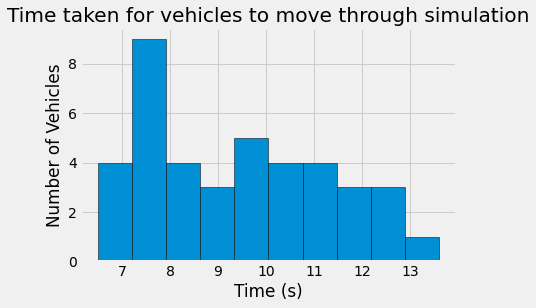

In [38]:
listt = []
lists = []
veh_t = []
stop = []
avg_speed = []
for i in range(len(df)):
    time_list_elements = list(eval(df.iloc[i]['time']))#time stamps for each vehicle 
    speed_list_elements = list(eval(df.iloc[i]['value']))#speed stamps for each vehicle
    listt.append(time_list_elements)#lol time
    lists.append(speed_list_elements)#lol speed
    stop_element = sum(i < 5 for i in speed_list_elements)
    stop.append(stop_element)
    avg_speed.append(st.mean(speed_list_elements))
    veh_t.append( time_list_elements[-1] - time_list_elements[0])


time_max = max([listelement[-1] for listelement in listt])
time_min = min([listelement[0] for listelement in listt])
sim_time = time_max - time_min
mean_veh_time = st.mean(veh_t)
mean_stop_time = st.mean(stop)
max_stop_time = max(stop)
max_veh_time = max(veh_t)
min_veh_time = min(veh_t)
median_veh_time = st.median(veh_t)
mean_veh_speed = st.mean(avg_speed)
print("Overall simulation statistics")
print(" simulation time is",sim_time,"\n",
    "Mean time is","%.2f" %mean_veh_time,"\n",
    "Median time is",median_veh_time, "\n",
 #   "Min time is",min_veh_time, "\n",
    "Max time is",max_veh_time,"\n",
    "Mean stop time is",mean_stop_time,"\n",
    "Max stop time is",max_stop_time,"\n",
    "Mean speed is ""%.2f" % mean_veh_speed)

#try and get histogram working if possible

plt.style.use('fivethirtyeight')
plt.hist(veh_t, bins=10, edgecolor='black')
plt.xlabel('Time (s)')
plt.ylabel('Number of Vehicles')
plt.title("Time taken for vehicles to move through simulation")


Statistics for vehicles initialising on the left road
Mean time is 44.00 
 Max time is 59 
 Mean stop time is 13.1 
 Max stop time is 27 
 Mean speed is 8.87 
 

Statistics for vehicles initialising on the bottom road
Mean time is 40.60 
 Max time is 59 
 Mean stop time is 6.85 
 Max stop time is 19 
 Mean speed is 9.81 
 



Text(0.5, 1.0, 'Time taken for vehicles to move through simulation')

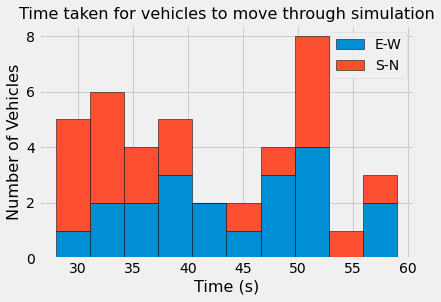

In [34]:
listt = []
lists = []
veh_t = []
stop = []
avg_speed = []
for i in range(len(df_left)):
    time_list_elements = list(eval(df_left.iloc[i]['time']))#time stamps for each vehicle 
    speed_list_elements = list(eval(df_left.iloc[i]['value']))#speed stamps for each vehicle
    listt.append(time_list_elements)#lol time
    lists.append(speed_list_elements)#lol speed
    stop_element = sum(i < 5 for i in speed_list_elements)
    stop.append(stop_element)
    avg_speed.append(st.mean(speed_list_elements))
    veh_t.append( time_list_elements[-1] - time_list_elements[0])


time_max = max([listelement[-1] for listelement in listt])
time_min = min([listelement[0] for listelement in listt])
sim_time = time_max - time_min
mean_veh_time = st.mean(veh_t)
mean_stop_time = st.mean(stop)
max_stop_time = max(stop)
max_veh_time = max(veh_t)
min_veh_time = min(veh_t)
median_veh_time = st.median(veh_t)
mean_veh_speed = st.mean(avg_speed)
print("\n""Statistics for vehicles initialising on the left road")
print("Mean time is","%.2f" %mean_veh_time,"\n",
    #"Median time is",median_veh_time, "\n",
    #"Min time is",min_veh_time, "\n",
    "Max time is",max_veh_time,"\n",
    "Mean stop time is",mean_stop_time,"\n",
    "Max stop time is",max_stop_time,"\n",
    "Mean speed is ""%.2f" % mean_veh_speed,"\n","\n")

#try and get histogram working if possible

#plt.style.use('fivethirtyeight')
#plt.hist(veh_t, bins=9, edgecolor='black')
#plt.xlabel('Time (s)')
#plt.ylabel('Number of Vehicles')
#plt.title("Time taken for vehicles to move through simulation")

#
#
#
#
#
#
#
#
#
#



listt2 = []
lists2 = []
veh_t2 = []
stop2 = []
avg_speed2 = []
for i in range(len(df_bottom)):
    time_list_elements2 = list(eval(df_bottom.iloc[i]['time']))#time stamps for each vehicle 
    speed_list_elements2 = list(eval(df_bottom.iloc[i]['value']))#speed stamps for each vehicle
    listt2.append(time_list_elements2)#lol time
    lists2.append(speed_list_elements2)#lol speed
    stop_element2 = sum(i < 5 for i in speed_list_elements2)
    stop2.append(stop_element2)
    avg_speed2.append(st.mean(speed_list_elements2))
    veh_t2.append( time_list_elements2[-1] - time_list_elements2[0])


time_max2 = max([listelement2[-1] for listelement2 in listt2])
time_min2 = min([listelement2[0] for listelement2 in listt2])
sim_time2 = time_max2 - time_min2
mean_veh_time2 = st.mean(veh_t2)
mean_stop_time2 = st.mean(stop2)
max_stop_time2 = max(stop2)
max_veh_time2 = max(veh_t2)
min_veh_time2 = min(veh_t2)
median_veh_time2 = st.median(veh_t2)
mean_veh_speed2 = st.mean(avg_speed2)
print("Statistics for vehicles initialising on the bottom road")
#" simulation time is",sim_time2,"\n",
print("Mean time is","%.2f" %mean_veh_time2,"\n",
   # "Median time is",median_veh_time2, "\n",
   # "Min time is",min_veh_time2, "\n",
    "Max time is",max_veh_time2,"\n",
    "Mean stop time is",mean_stop_time2,"\n",
    "Max stop time is",max_stop_time2,"\n",
    "Mean speed is ""%.2f" % mean_veh_speed2,"\n","\n")



combined_list = [veh_t,veh_t2]
#combined_list = [stop,stop2]
labels = ['E-W','S-N']
#try and get histogram working if possible

plt.style.use('fivethirtyeight')
plt.hist(combined_list, bins=10, histtype='bar',  stacked = True, edgecolor='black',label = labels)
plt.legend()
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Number of Vehicles', fontsize = 16)
plt.title('Time taken for vehicles to move through simulation', fontsize = 16)
#handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium]]
#labels = ["East-West","South-North"]
#plt.legend(handles,labels)



#note to self, next job is to add legend to histogram, 



